## Project 2: Heun Method


### Abstract & Description

###### * Two Learning Goals

This project involves two related learning goals 1) Begin to learn a slightly improved method of integrating a differential equation (The Heun Method) and 2) learn how to turn higher order equations into a set of first order coupled equations along with a simple technique to manage the extra complexity.

###### * The Heun Method
While Euler's Method is quite easy and accurate enough for simple problems it is less successful when applied to more challenging situations. Depending on the nature of the function $f(s,t)$ Euler's Method can easily under or overestimate the change. Getting satisfactory results using the Euler Method can require very small time steps, making the algorithm very slow.

Starting at $x_1$ find the slope $f(s,t)$ and extrapolate out to $x_1 + \Delta x$.

### Algorithm & Discussion

For this project, we will consider a Soccer player on top of a 20m high building. The Soccer player will use all his strength and kick a 0.43 kgs soccer ball very high with an initial velocity of 50 m/s. 
The goal here is to predict the future or the trajectory of the ball without using any pre-established law of physics for projectile motion and collect some important data such as range, time etc. To do so, we will need to consider the average of two seperate derivatives taken from the same problem at a time t and t+ds.

Steps: 
* Starting at $x_1$ find the slope $f(s,t)$ and extrapolate out to $x_1 + \Delta x$.
* Next.. evaluate the slope at the extrapolated value of s.
* Using this slope.. extrapolate again. Note that while the first extrapolation underestimated the change in s, the second overestimated. Heun's method is to use the average of these two estimates.

In short:
    
    * first evaluate f(s,x):

$$f_1 = f(s_1, x_1)$$
next jump to the next x:

$$x_2 = x_1 + \Delta x$$
estimate the new value of s:

$$s_2 = s_1 + f(s_1,x_1) \Delta x$$
Evaluate f(s,t) at the new position:

$$f_2 = f(s_2, x_2)$$
Extrapolate using the average of the 'f' values:

$$s_3 = s_1 + \frac{1}{2}(f_1 + f_2) \Delta x$$
Now $s_3$ is the Heun's Method result.







### Implementation/ Code & Results

Populating the interactive namespace from numpy and matplotlib
************
*Important data collected using Heun Method
* -----------------------------------------
* Total time (sec):  9.299999999999983
* Highest altitude (m):  115.56478883257635
* at time (s) 4.4
* Range (m) 229.99999999999966
************


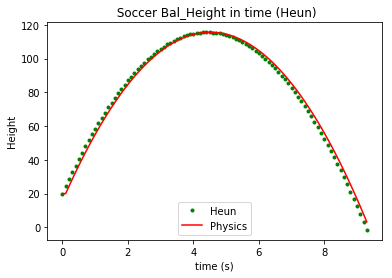

In [1]:
%pylab inline

yo = 20 #m
xo = 0  #m

m = 0.43 #kgs
g = array([0,-9.81]) #m/s/s
vox = 50*cos(60*pi/180.0) #m/s
voy = 50*sin(60*pi/180.0) #m/s
dt = 0.1 #s
t = 0 #s
tf = 5 #s

s = array([xo,yo,vox,voy]) #initialize the state

def deriv_position(s,t):  #Define the derivatives
    r=s[0:2]   #Position components
    v=s[2:4]   #Velocity components
    drdt = v   # derivative of position is velocity
    dvdt = g   # derivative of velocity is acceleration
    return array([drdt[0],drdt[1],dvdt[0],dvdt[1]])

def HeunStep (s,t,deriv,dt):   # Define the Heun steps
    f1 = deriv(s,t)        
    f2 = deriv(s+f1*dt,t+dt)
    return 0.5*(f1+f2)*dt+s       #The value to return 

tlist = [t]     #List containing t + time steps   
ylist = [yo]    #list containing the values obtained using Heun steps
y2list =[yo]
hf =[0,0];
print("************")
print("*Important data collected using Heun Method")

print("* -----------------------------------------")
while s[1]>0:
    s = HeunStep(s, t, deriv_position, dt)
    y = (0.5*g[1]*t*t)+(50*sin(60*pi/180)*t)+20      #Using physics to determine the actual curve
    x = 50*cos(60*pi/180)*t
    t += dt
    ylist.append(s[1])
    y2list.append(y)
    tlist.append(t)
    if (s[1]>hf[0]):
        hf = [s[1],t]
    if (s[1]<=0):
        print("* Total time (sec): ",t)
print("* Highest altitude (m): ",hf[0])
print("* at time (s)",hf[1])
print("* Range (m)",x)
print("************")
xlabel("time (s)")
ylabel("Height")
title(" Soccer Bal_Height in time (Heun)")

plot(tlist,ylist,'g.',tlist,y2list,'r-')  #graphs
legend(['Heun','Physics',],loc=8)

In this section, we will mostly be comparing the collected data using the Heun Method versus the data using the known laws of physics.
We will be using the website OmniCalculator in order to obtain the actual data.
https://www.omnicalculator.com/physics/projectile-motion

The online calculator provided the following data:
* Time of flight: 9.27096 sec
* Range: 231.774 m
* Maximum height: 115.5984 m at 4.6355 s

For error calculations, we will use the following formula:

$$ Error = \frac{Data_Physics - Data_Heun}{Data_Physics} x 100 $$

In [2]:
hf1= 115.56478883257635
hf2 = 4.4
ErrTime = abs((9.27096-t)/9.27096*0.01)
ErrRange = abs((231.774-x)/231.774*0.01)
ErrMaxH = abs((115.5984-hf1)/115.5984*0.01)
ErrMaxT = abs((115.5984-hf2)/115.5984*0.01)

### Conclusion

In [3]:
print(" Error in time of flight(%) : ",ErrTime)
print(" Error in range(%) : ",ErrRange)
print(" Error in Maximum Height(%) : ",ErrMaxH)
print(" Error in time of Max_Height(%) : ",ErrMaxT)

 Error in time of flight(%) :  3.132361697168622e-05
 Error in range(%) :  7.654007783445693e-05
 Error in Maximum Height(%) :  2.907580677902415e-06
 Error in time of Max_Height(%) :  0.009619371894420685


In order to conclude, we used two approaches to collect the data of the flight. We assumed that air resistance(drag) was negligible due to the mass of the soccer ball. Heun Method was the centerpiece of our project and gave us very reasonable values and then we used an online calculator to validate our values. All the errors measured are under 1 percent. These values were expected. By looking at the two curves on the graph, we can see how slight is the difference between different values at a particular time t.